In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_limpio.csv')

C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\2613414705.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x=col, y="PUNT_MATEMATICAS", palette="Set2")
C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\2613414705.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x=col, y="PUNT_MATEMATICAS", palette="Set2")


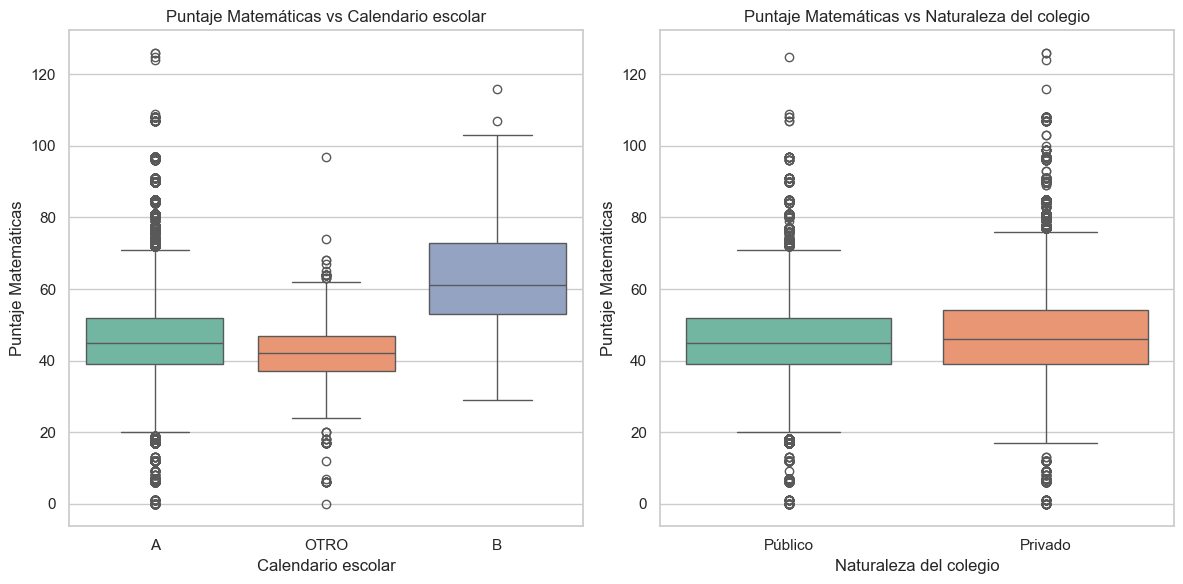

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Crear copia del DataFrame con etiquetas legibles
df_plot = df.copy()
df_plot["COLE_NATURALEZA_OFICIAL"] = df_plot["COLE_NATURALEZA_OFICIAL"].map({True: "Público", False: "Privado"})

# Variables a graficar
categorical_vars = [
    ("COLE_CALENDARIO", "Calendario escolar"),
    ("COLE_NATURALEZA_OFICIAL", "Naturaleza del colegio")
]

# Graficar
for i, (col, label) in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df_plot, x=col, y="PUNT_MATEMATICAS", palette="Set2")
    plt.title(f"Puntaje Matemáticas vs {label}")
    plt.xlabel(label)
    plt.ylabel("Puntaje Matemáticas")

plt.tight_layout()
plt.show()




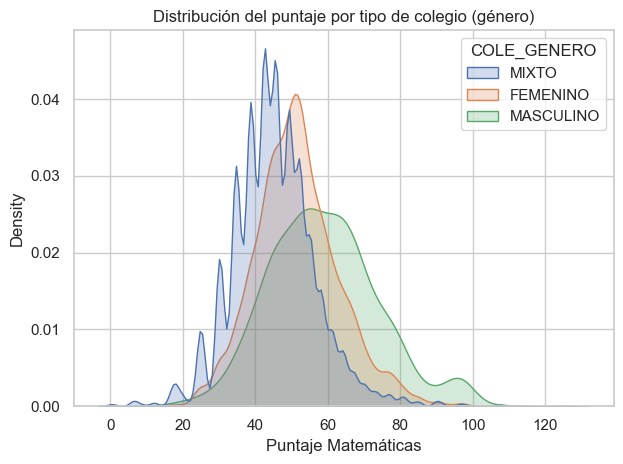

In [11]:
sns.kdeplot(data=df, x="PUNT_MATEMATICAS", hue="COLE_GENERO", common_norm=False, fill=True)
plt.title("Distribución del puntaje por tipo de colegio (género)")
plt.xlabel("Puntaje Matemáticas")
plt.tight_layout()
plt.show()


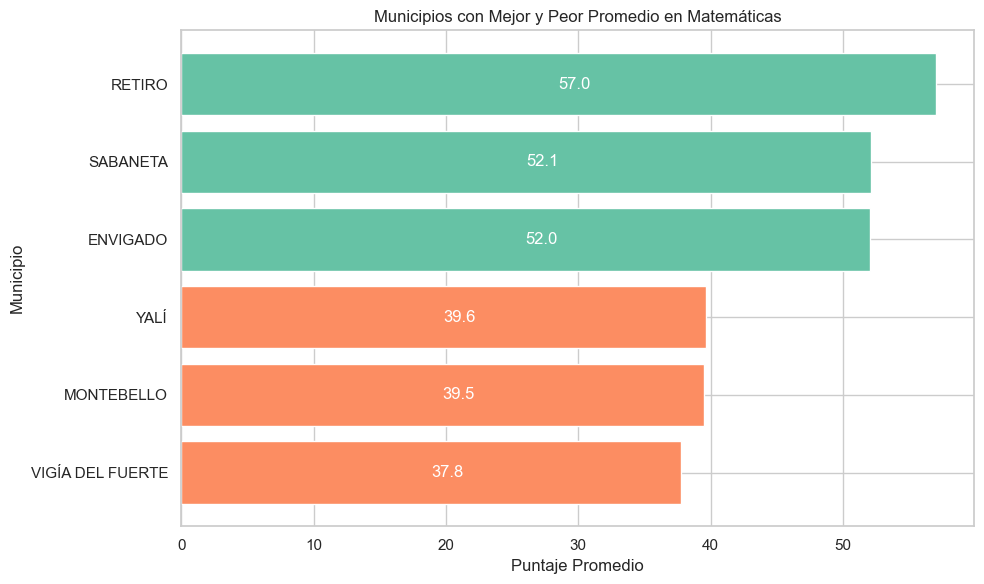

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por municipio y calcular promedio
avg_mpio = df.groupby("COLE_MCPIO_UBICACION")["PUNT_MATEMATICAS"].mean()

# Seleccionar mejores y peores
mejores = avg_mpio.sort_values(ascending=False).head(3)
peores = avg_mpio.sort_values().head(3)

# Concatenar
seleccionados = pd.concat([peores, mejores])

# Crear colores: rojo para peores, verde para mejores
colores = ["#fc8d62"] * 3 + ["#66c2a5"] * 3

# Ordenar para graficar
seleccionados = seleccionados.sort_values()

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.barh(seleccionados.index, seleccionados.values, color=colores)

# Agregar etiquetas de texto con el puntaje
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.5*width, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', color="white")

plt.title("Municipios con Mejor y Peor Promedio en Matemáticas")
plt.xlabel("Puntaje Promedio")
plt.ylabel("Municipio")
plt.tight_layout()
plt.show()




C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\2100653954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="COLE_JORNADA", y="PUNT_MATEMATICAS", inner="quartile", palette="muted")


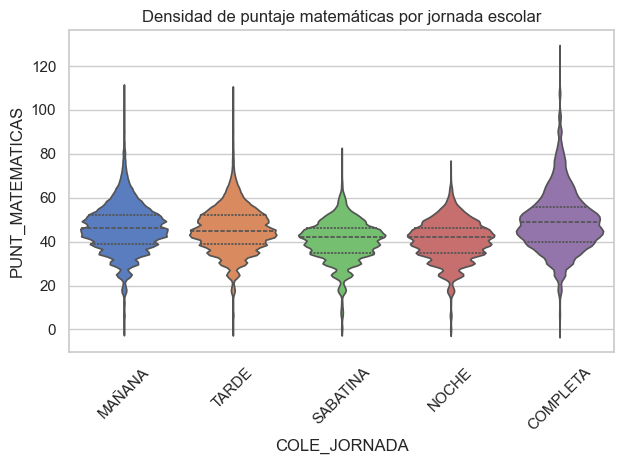

In [23]:
sns.violinplot(data=df, x="COLE_JORNADA", y="PUNT_MATEMATICAS", inner="quartile", palette="muted")
plt.title("Densidad de puntaje matemáticas por jornada escolar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\1490447581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="COLE_BILINGUE_S", y="PUNT_MATEMATICAS", palette="Set2")


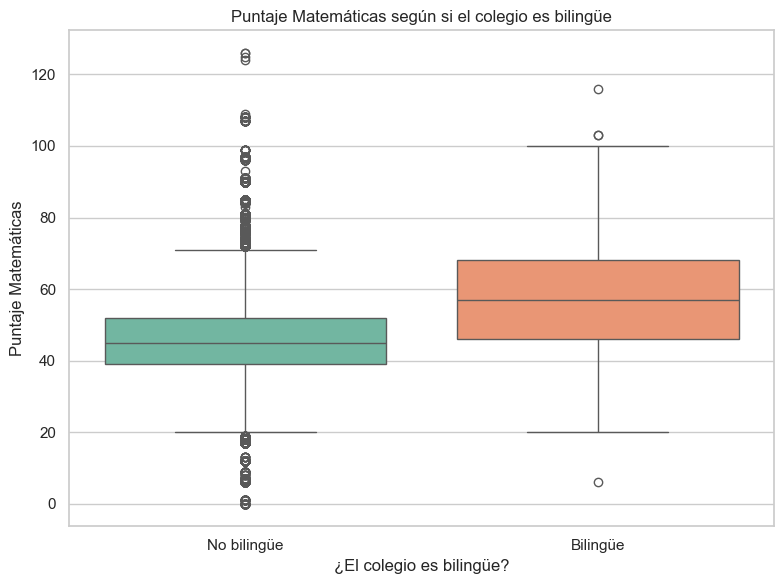

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Reemplazar valores booleanos por etiquetas legibles
df["COLE_BILINGUE_S"] = df["COLE_BILINGUE_S"].map({True: "Bilingüe", False: "No bilingüe"})

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="COLE_BILINGUE_S", y="PUNT_MATEMATICAS", palette="Set2")

# Títulos y etiquetas
plt.title("Puntaje Matemáticas según si el colegio es bilingüe")
plt.xlabel("¿El colegio es bilingüe?")
plt.ylabel("Puntaje Matemáticas")
plt.tight_layout()
plt.show()


C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\1199904042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtrado, x="FAMI_EDUCACIONMADRE", y="PUNT_MATEMATICAS", palette="Set3")


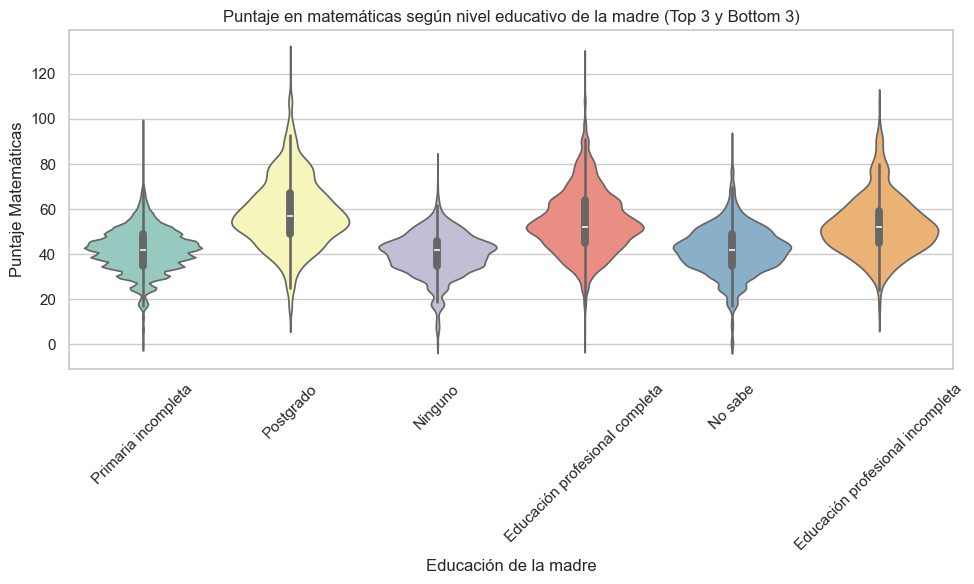

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular promedio por nivel educativo
promedios = df.groupby("FAMI_EDUCACIONMADRE")["PUNT_MATEMATICAS"].mean()

# Seleccionar 3 mayores y 3 menores
mejores = promedios.sort_values(ascending=False).head(3).index
peores = promedios.sort_values().head(3).index

# Combinar niveles seleccionados
niveles_seleccionados = list(mejores) + list(peores)

# Filtrar el DataFrame
df_filtrado = df[df["FAMI_EDUCACIONMADRE"].isin(niveles_seleccionados)]

# Graficar
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtrado, x="FAMI_EDUCACIONMADRE", y="PUNT_MATEMATICAS", palette="Set3")
plt.title("Puntaje en matemáticas según nivel educativo de la madre (Top 3 y Bottom 3)")
plt.xlabel("Educación de la madre")
plt.ylabel("Puntaje Matemáticas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Felipe\AppData\Local\Temp\ipykernel_26980\3912069094.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x="FAMI_ESTRATOVIVIENDA", y="PUNT_MATEMATICAS", order=orden, palette="Set2")


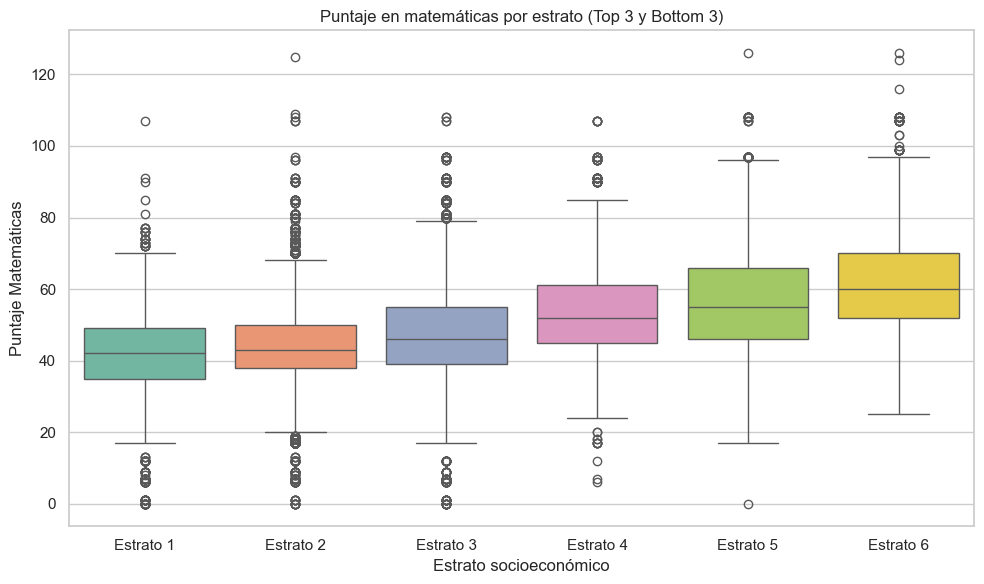

In [32]:
# Calcular promedio por estrato
promedios_estrato = df.groupby("FAMI_ESTRATOVIVIENDA")["PUNT_MATEMATICAS"].mean()

# Seleccionar top 3 y bottom 3 estratos
top_estratos = promedios_estrato.sort_values(ascending=False).head(3).index
bottom_estratos = promedios_estrato.sort_values().head(3).index
estratos_seleccionados = list(bottom_estratos) + list(top_estratos)

# Filtrar el DataFrame
df_filtrado = df[df["FAMI_ESTRATOVIVIENDA"].isin(estratos_seleccionados)]

# Orden para mostrar de menor a mayor rendimiento
orden = promedios_estrato.loc[estratos_seleccionados].sort_values().index

# Crear boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x="FAMI_ESTRATOVIVIENDA", y="PUNT_MATEMATICAS", order=orden, palette="Set2")
plt.title("Puntaje en matemáticas por estrato (Top 3 y Bottom 3)")
plt.xlabel("Estrato socioeconómico")
plt.ylabel("Puntaje Matemáticas")
plt.tight_layout()
plt.show()

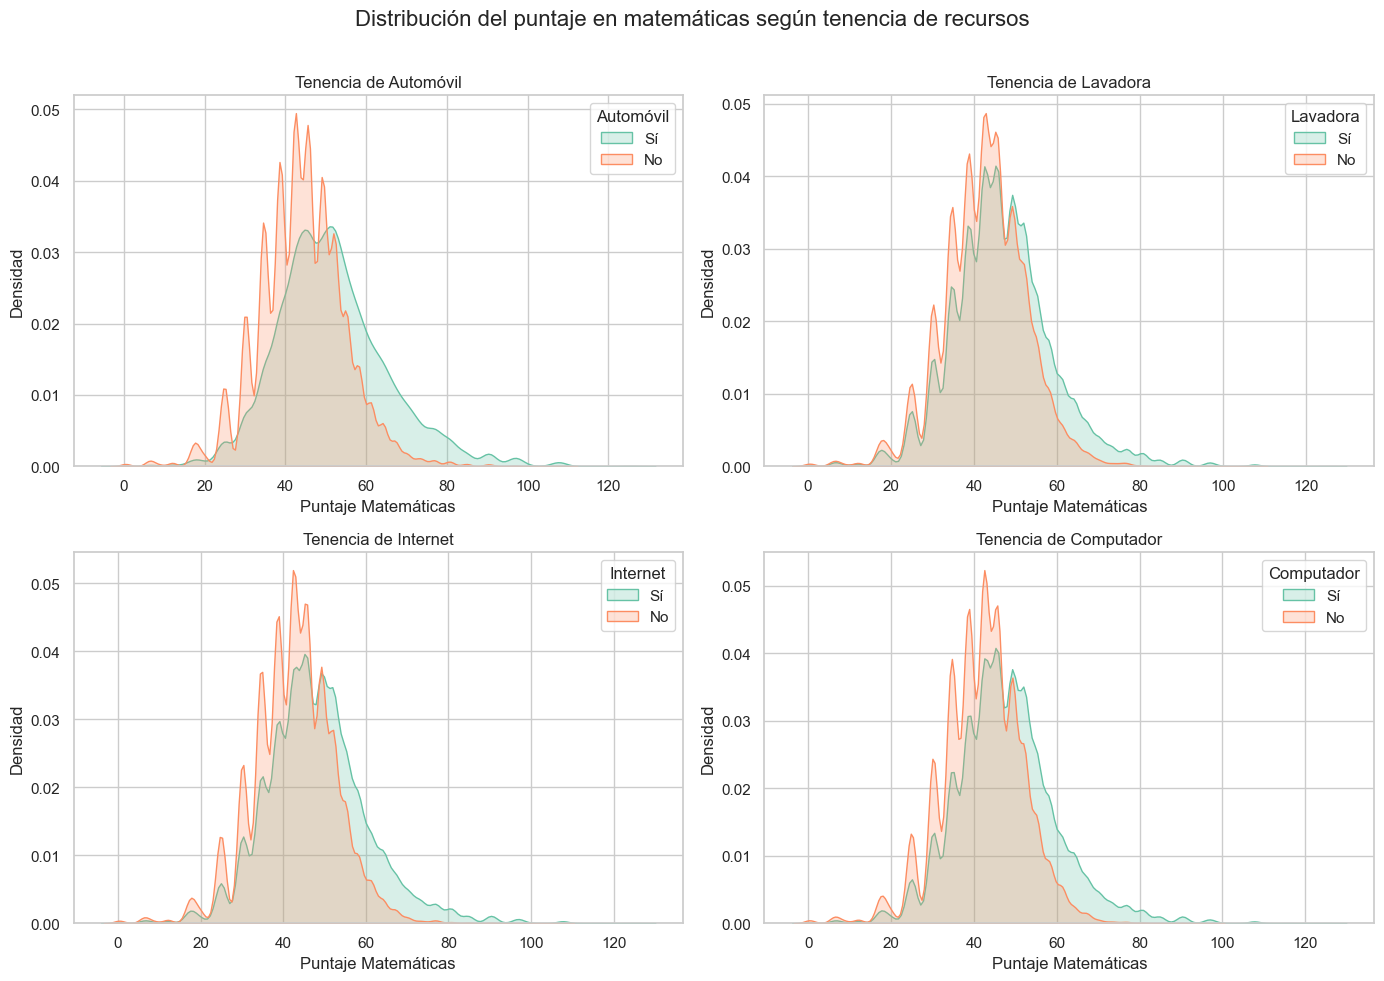

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a graficar: (columna, nombre legible)
bienes = [
    ("FAMI_TIENEAUTOMOVIL_Si", "Automóvil"),
    ("FAMI_TIENELAVADORA_Si", "Lavadora"),
    ("FAMI_TIENEINTERNET_Si", "Internet"),
    ("FAMI_TIENECOMPUTADOR_Si", "Computador")
]

# Colores personalizados
color_si = "#66c2a5"   # Verde azulado
color_no = "#fc8d62"   # Naranja suave

# Estilo visual
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Crear cada subplot
for i, (var, label) in enumerate(bienes):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    sns.kdeplot(data=df[df[var] == True], x="PUNT_MATEMATICAS", fill=True, label="Sí", ax=ax, color=color_si)
    sns.kdeplot(data=df[df[var] == False], x="PUNT_MATEMATICAS", fill=True, label="No", ax=ax, color=color_no)

    ax.set_title(f"Tenencia de {label}")
    ax.set_xlabel("Puntaje Matemáticas")
    ax.set_ylabel("Densidad")
    ax.legend(title=label)

# Ajustar espacio entre gráficos
plt.suptitle("Distribución del puntaje en matemáticas según tenencia de recursos", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()





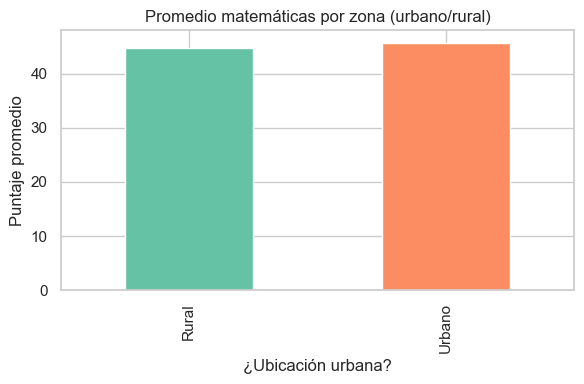

In [37]:
import matplotlib.pyplot as plt

# Calcular promedios por zona
zona_promedio = df.groupby("COLE_AREA_UBICACION_URBANO")["PUNT_MATEMATICAS"].mean()

# Definir colores personalizados
colores = ["#66c2a5", "#fc8d62"]  # Rural, Urbano

# Graficar
zona_promedio.plot(kind="bar", color=colores, figsize=(6, 4))

plt.title("Promedio matemáticas por zona (urbano/rural)")
plt.xlabel("¿Ubicación urbana?")
plt.ylabel("Puntaje promedio")
plt.xticks(ticks=[0, 1], labels=["Rural", "Urbano"])
plt.tight_layout()
plt.show()



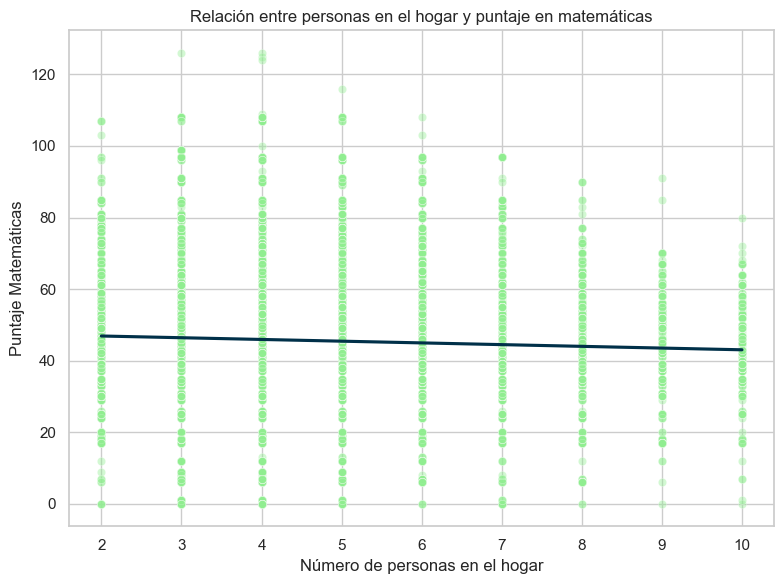

In [47]:
# Corrige el nombre de la columna si tiene espacios
df.columns = df.columns.str.strip()

# Transformación de texto a número
df["PERSONAS_HOGAR_NUM"] = df["FAMI_PERSONASHOGAR"].str.lower().map({
    "uno": 1, "dos": 2, "tres": 3, "cuatro": 4, "cinco": 5,
    "seis": 6, "siete": 7, "ocho": 8, "nueve": 9, "diez": 10,
    "más de diez": 11, "no sabe": None
})

# Gráfico con colores específicos y flecha
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PERSONAS_HOGAR_NUM", y="PUNT_MATEMATICAS", alpha=0.4, color="#90ee90")
sns.regplot(data=df, x="PERSONAS_HOGAR_NUM", y="PUNT_MATEMATICAS", scatter=False, color="#003049")
plt.title("Relación entre personas en el hogar y puntaje en matemáticas")
plt.xlabel("Número de personas en el hogar")
plt.ylabel("Puntaje Matemáticas")

plt.tight_layout()
plt.show()




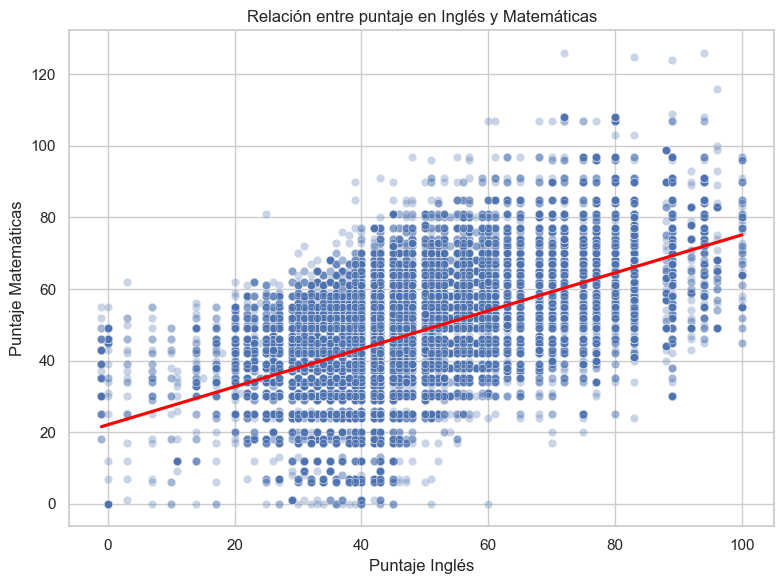

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PUNT_INGLES", y="PUNT_MATEMATICAS", alpha=0.3)
sns.regplot(data=df, x="PUNT_INGLES", y="PUNT_MATEMATICAS", scatter=False, color="red")
plt.title("Relación entre puntaje en Inglés y Matemáticas")
plt.xlabel("Puntaje Inglés")
plt.ylabel("Puntaje Matemáticas")
plt.grid(True)
plt.tight_layout()
plt.show()
